In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
from collections import defaultdict
import json
import numpy as np
import pandas as pd

In [5]:
def is_experiment_start(line):
    return line.startswith('evaluating for')

def skip_n_experiments(input_file, experiment_num):
    current_experiment = 0
    while current_experiment < experiment_num:
        line = input_file.readline()
        if is_experiment_start(line):
            current_experiment += 1
            
def parse_experiment(experiment_log):
    current_recommender = None
    result = []
    for line in experiment_log:
            if line.startswith('evaluating '):
                current_recommender = line.split(' ')[1]
            try:
                experiment_results = json.loads(line)
                experiment_results['model_name'] =  current_recommender
                result.append(experiment_results)
            except:
                pass
    return result
def get_data_from_logs(logfile, experiment_num):
    current_experiment = 0
    with open(logfile) as input_file:
        skip_n_experiments(input_file, experiment_num)
        experiment_log = []
        for line in input_file:
            if is_experiment_start(line):
                break
            else:
                experiment_log.append(line.strip())
        return parse_experiment(experiment_log)

In [6]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [12]:
experiment_logs = './results/booking_config_2021_01_09T13_34_04/stdout'
data = get_data_from_logs(experiment_logs, 0)


In [13]:
df = pd.DataFrame(data).set_index('model_name').sort_values('ndcg@40')
df

,precision@4,SPS@4,ndcg@4,ndcg@40,model_build_time,model_inference_time,model_metadata
model_name,,,,,,,
top_recommender,0.013500,0.054,0.036515,0.087778,0.009906,0.010413,{}
svd_filter_visited,0.041250,0.165,0.130928,0.164938,0.376445,3.716712,{'proxy_model': 'filter_seen_recommender'}
conditional_top_filter_visited,0.056833,0.227,0.177955,0.226917,0.005655,0.021087,{'proxy_model': 'filter_seen_recommender'}
svd_recommender,0.066500,0.266,0.204432,0.250741,0.385552,3.574076,{}
conditional_top_recommender,0.094000,0.375,0.280757,0.345082,0.002929,0.014941,{}


<IPython.core.display.Javascript object>


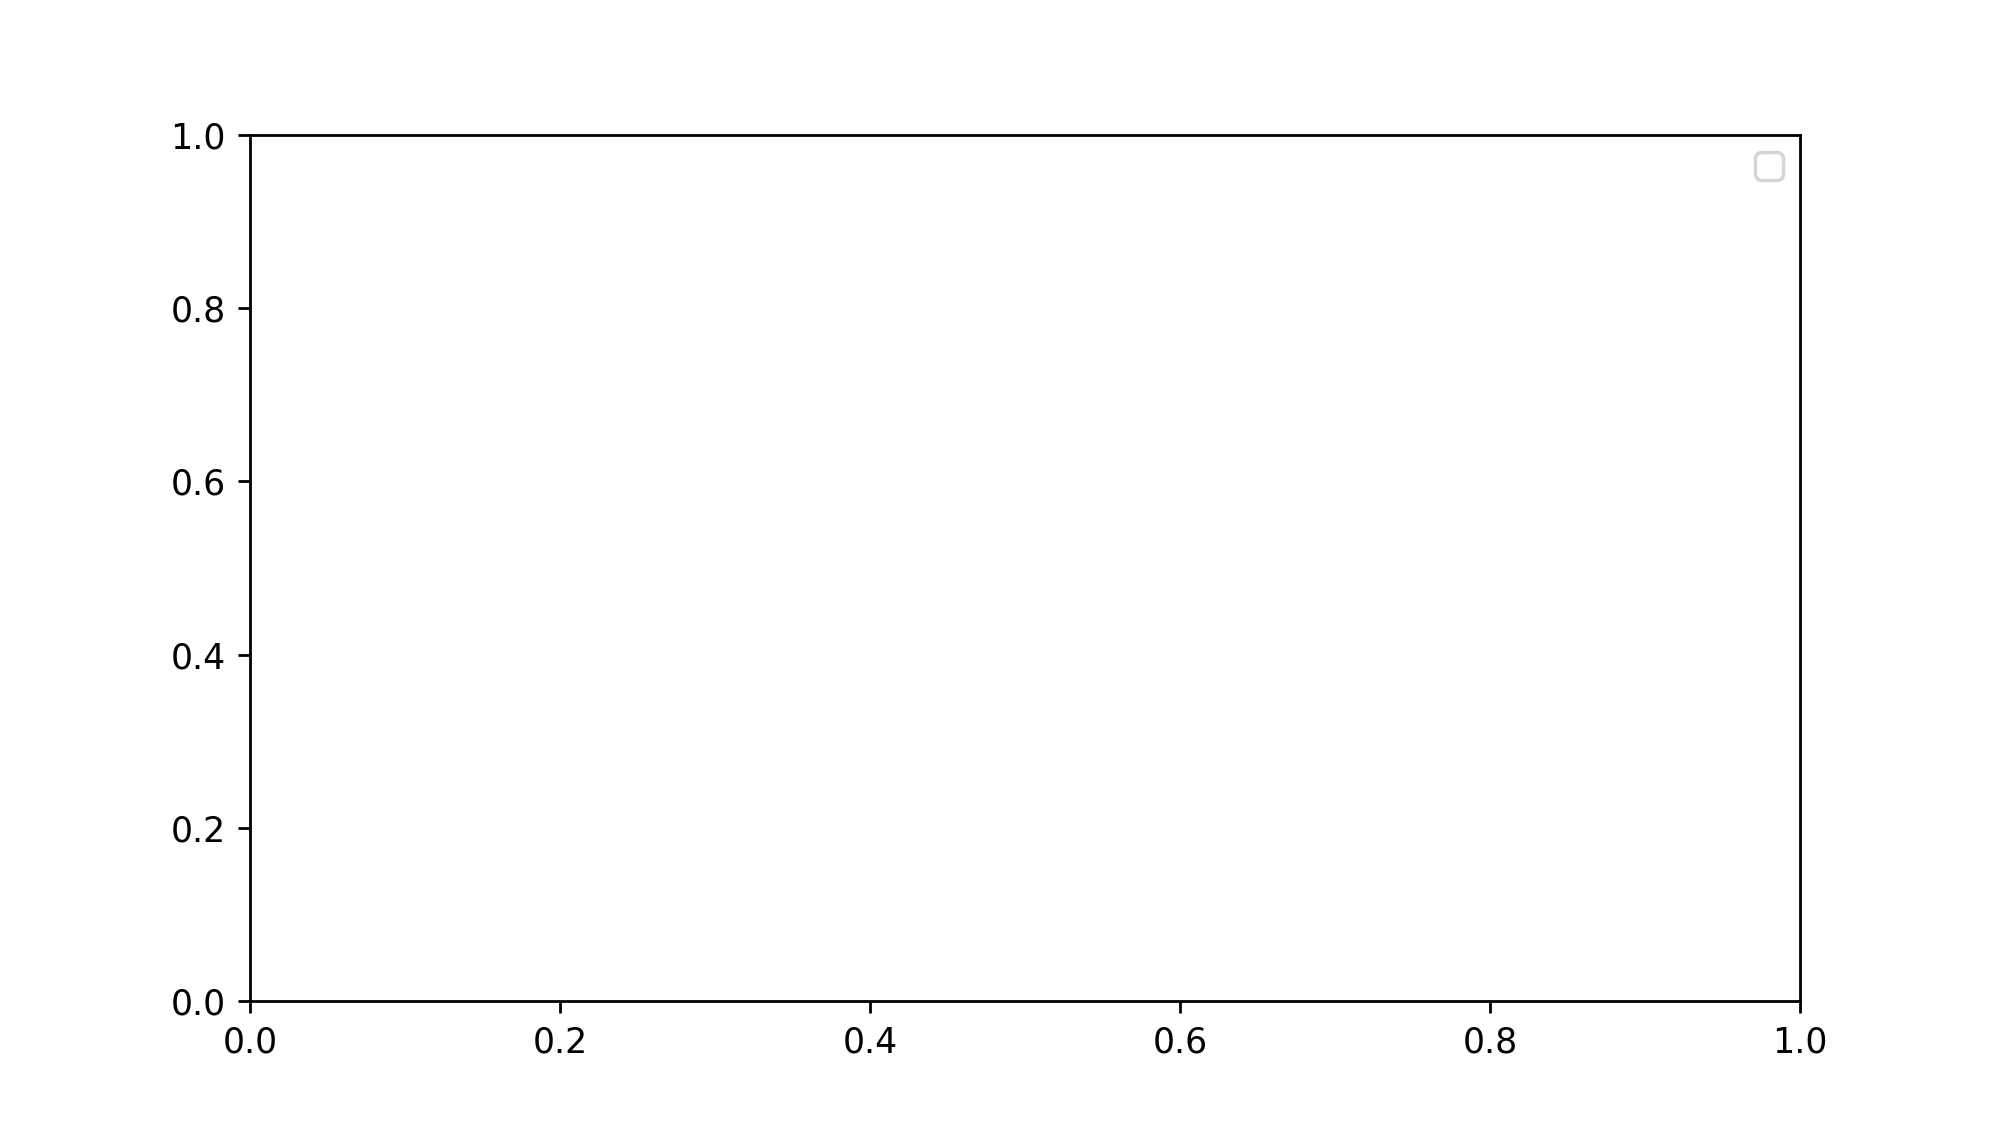

No handles with labels found to put in legend.


In [14]:
plt.figure(figsize=(8, 4.5))
for recommender in data:
    if 'val_ndcg_history' in recommender['model_metadata']:
        history = moving_average(recommender['model_metadata']['val_ndcg_history'], 1)
        plt.plot(history, label=recommender['model_name'])
    
plt.legend()


<IPython.core.display.Javascript object>


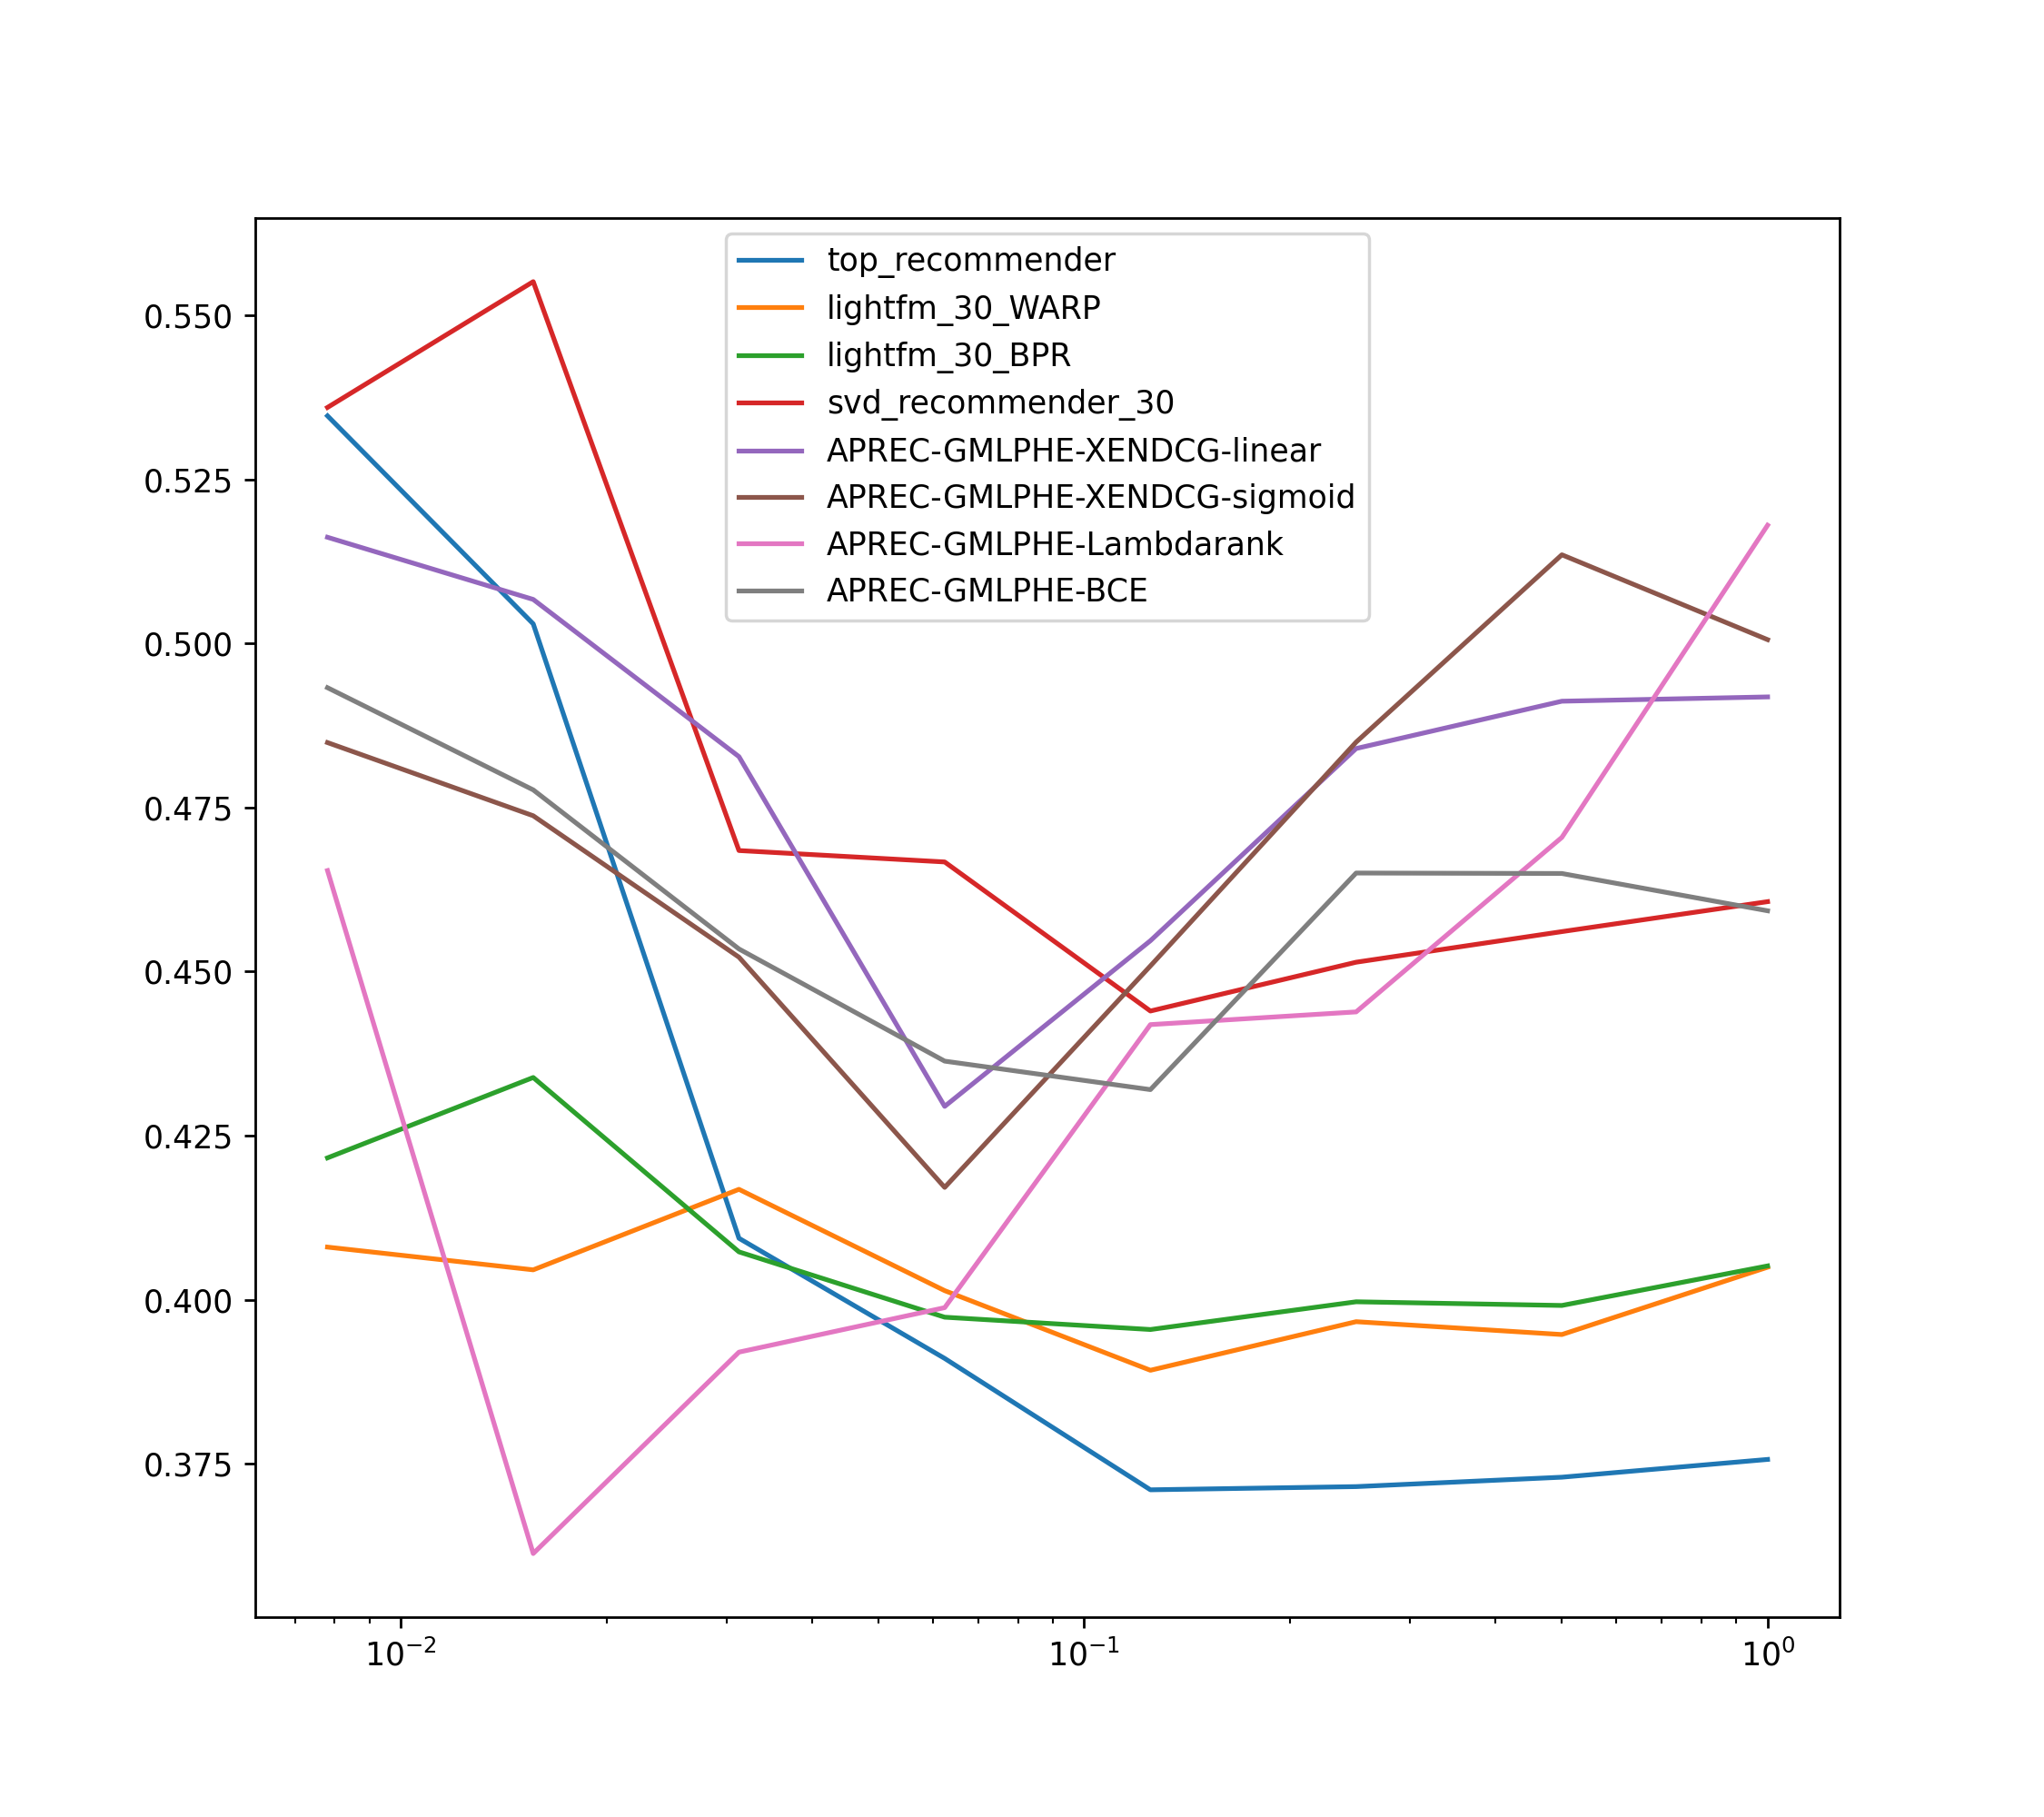

In [177]:
results = defaultdict(list)
n_experiments = 8

fractions = []
for experiment_num in range (1, n_experiments + 1,):
    fraction = (2 ** (experiment_num - n_experiments))
    fractions.append(fraction)
    data = get_data_from_logs(experiment_logs, experiment_num)
    for recommender in data:
        results[recommender['model_name']].append(recommender['ndcg@40'])
        
plt.figure(figsize=(9, 8))
plt.xscale('log')

        
for recommender in results:
    plt.plot(fractions[0:], results[recommender][0:], label=recommender)
    
plt.legend()


In [157]:
results['top_recommender']

[0.3756500509069256,
 0.3756500509069256,
 0.3756500509069256,
 0.3756500509069256,
 0.3756500509069256,
 0.3756500509069256,
 0.3756500509069256,
 0.3756500509069256]

In [2]:
6000 / 138000

0.043478260869565216